In [1]:
!pip install tensorflow keras numpy matplotlib seaborn


In [2]:
#Load IMDB DataSet
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load IMDB dataset
max_words = 10000  # Number of most frequent words to keep
maxlen = 200  # Maximum sequence length

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

# Pad sequences to ensure uniform input size
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

print(f"Training samples: {X_train.shape}, Test samples: {X_test.shape}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: (25000, 200), Test samples: (25000, 200)


In [3]:
#Build CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense

embedding_dim = 128

cnn_model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Build the Hierarchical Attention Network (HAN)
from tensorflow.keras.layers import LSTM, Bidirectional, Attention, Input, Dropout
from tensorflow.keras.models import Model

def build_han():
    input_layer = Input(shape=(maxlen,))
    embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen)(input_layer)

    lstm_layer = Bidirectional(LSTM(64, return_sequences=True))(embedding_layer)
    attention_layer = Attention()([lstm_layer, lstm_layer])

    flatten_layer = Flatten()(attention_layer)
    dense_layer = Dense(128, activation='relu')(flatten_layer)
    output_layer = Dense(1, activation='sigmoid')(dense_layer)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

han_model = build_han()
han_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 200)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 200, 128)       │      1,280,000 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 200, 128)       │         98,816 │ embedding_1[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention (Attention)     │ (None, 200, 128)       │              0 │ bidirectional[0][0],   │
│                           │                        │                │ bidirectional[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 25600)          │              0 │ attention[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 128)            │      3,276,928 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │            129 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 4,655,873 (17.76 MB)

 Trainable params: 4,655,873 (17.76 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train Both Model
cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))
han_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 122s 153ms/step - accuracy: 0.7064 - loss: 0.4989 - val_accuracy: 0.8843 - val_loss: 0.2785
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 126s 133ms/step - accuracy: 0.9388 - loss: 0.1608 - val_accuracy: 0.8784 - val_loss: 0.2963
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 130ms/step - accuracy: 0.9787 - loss: 0.0683 - val_accuracy: 0.8416 - val_loss: 0.5081
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 129ms/step - accuracy: 0.9927 - loss: 0.0232 - val_accuracy: 0.8647 - val_loss: 0.5916
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 144s 132ms/step - accuracy: 0.9954 - loss: 0.0139 - val_accuracy: 0.8662 - val_loss: 0.7188
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 354s 446ms/step - accuracy: 0.7547 - loss: 0.4634 - val_accuracy: 0.8846 - val_loss: 0.2729
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 396s 464ms/step - accuracy: 0.9277 - loss: 0.1861 - val_accuracy: 0.8831 - val_loss: 0.2859
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 375s 454ms/step - accuracy: 0.9619 - loss: 0

In [6]:
#Step 6: Evaluate and Compare
#We will compare Accuracy, F1-score, AUC-ROC, and Inference Time.

from sklearn.metrics import accuracy_score, classification_report
import time

def evaluate_model(model, X_test, y_test):
    start_time = time.time()
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    end_time = time.time()

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    inference_time = end_time - start_time

    print(f"Model Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print(f"Inference Time: {inference_time:.4f} seconds")

    return accuracy, inference_time

cnn_accuracy, cnn_time = evaluate_model(cnn_model, X_test, y_test)
han_accuracy, han_time = evaluate_model(han_model, X_test, y_test)


782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step
Model Accuracy: 0.8662
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86     12500
           1       0.85      0.88      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000

Inference Time: 20.5753 seconds
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step
Model Accuracy: 0.8724
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87     12500
           1       0.87      0.88      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000

Inference Time: 81.9791 seconds


  Model  Accuracy  Inference Time (sec)
0   CNN   0.86616             20.575315
1   HAN   0.87240             81.979105


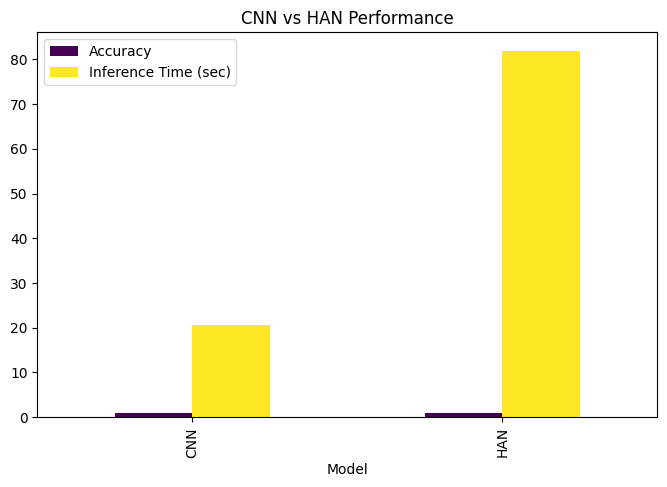

In [10]:
# Performance Comparison
import pandas as pd
import matplotlib.pyplot as plt

results = pd.DataFrame({
    "Model": ["CNN", "HAN"],
    "Accuracy": [cnn_accuracy, han_accuracy],
    "Inference Time (sec)": [cnn_time, han_time]
})

print(results)

# Bar plot comparison
results.set_index("Model").plot(kind="bar", figsize=(8,5), colormap="viridis")
plt.title("CNN vs HAN Performance")
plt.show()
